I refered the K-means Clustering on website : "https://machinelearningcoban.com/2017/01/01/kmeans/" while doing this
homework, so there will be similarities in the codebase.

Trying to follow the given paths.

Import libraries:

Note: Set seed = 200

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import logging
np.random.seed(200)

The below function will display the graph, i set the markersize equal to 1 to have a better visualization

Set the scale to equal, that means 1 unit horizontal == 1 unit vertical in the plot

In [35]:
def display(dataset, label):
    x0 = dataset[label == 0, :]
    x1 = dataset[label == 1, :]
    x2 = dataset[label == 2, :]

    plt.plot(x0[:, 0], x0[:, 1], 'b^', markersize = 1)
    plt.plot(x1[:, 0], x1[:, 1], 'go', markersize = 1)
    plt.plot(x2[:, 0], x2[:, 1], 'rs', markersize = 1)

    plt.axis('equal')
    plt.plot()
    plt.show()

The below function choose random point in the cluster as initial centers

In [36]:
def choose_centers(dataset, k):
    return dataset[np.random.choice(dataset.shape[0], k, replace=False)]

The below function assign the label for points in clusters by the distance between that point and all of the centers

The label for a point in a cluster is the label of the center which is closest to the point

In [37]:
def assign_labels(dataset, centers):
    D = cdist(dataset, centers)
    D2 = centers[0] - dataset
    D3 = centers[1] - dataset
    D4 = centers[2] - dataset
    # print(D)
    # print('Distance between center and points:',D2)
    return np.argmin(D, axis = 1)

The below function is to update the center to minimize the total average distance between center and all the points in
the cluster.

The function will create an zero filled array with size (k, dataset.shape[1])) and set it as centers to work with
-> quick note: since we are dealing with 2-D space so the centers will have the size of (k,2)

In [38]:
def update_centers(dataset, labels, k):
    centers = np.zeros((k, dataset.shape[1]))
    for index in range(k):
        Xk = dataset[labels == index, :]
        centers[index,:] = np.mean(Xk, axis = 0)
    return centers

The below function check if converged, if converged -> 2 set contain old centers and new centers+ are the same

-> New and center are the same -> same set

Alternative way -> set threshold that is a very small number, if the distance between old and new center are smaller
than that threshold -> converged. Else return False

In [39]:
def converged(centers, new_centers):
    # logging.info([tuple(a) for a in centers])
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

The below function will first choose 3 random points and set it as the 3 initial centers

Assume that point is a center of the cluster, add that point into the list named "labels" to label the point
accordingly, test if that point satisfies that the average distance between that point and all the points in the cluster
is the smallest. If that point satisfies, break and return

In [40]:
def kmeans(dataset, k):
    centers = [choose_centers(dataset, k)]
    labels = []
    it = 0
    # print(dataset)
    # print('center:',centers)
    while True:
        labels.append(assign_labels(dataset, centers[-1]))
        new_centers = update_centers(dataset, labels[-1], k)
        if converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return centers, labels, it


Clusters created with multivariate_normal() function in numpy.random to ensure data follows
multivariate normal distribution

Working with 3 clusters, if you want to work with more custers, modify the code, create more means and clusters

REMEMBER TO KEEP THE SAME COVARIANCE!!! Well you actually can change the covariance, but each cluster would not be as
round as the value $$ \begin{bmatrix}1 & 0\\0 & 1\end{bmatrix} $$

In [41]:
means = [[-1, -1], [4, 4], [8, 12]]
cov = [[1, 0], [0, 1]]

n = int(input('Enter size of cluster'))
x0 = np.random.multivariate_normal(mean=means[0], cov=cov, size=n)
x1 = np.random.multivariate_normal(mean=means[1], cov=cov, size=n)
x2 = np.random.multivariate_normal(mean=means[2], cov=cov, size=n)


Concatenate all generated data into one array using np.concatenate, axis = 0 -> stack on each other

Create labels using number * the length of each cluster, then transpose it into a [m*1] matrix, with m = the number of
elements in each cluster time the number of clusters, if you add more clusters to the game, add more label to the
original_label

In [42]:
dataset = np.concatenate((x0, x1, x2), axis = 0)
k = 3
original_label = np.asarray([0]*n + [1]*n + [2]*n).T

Preview the first 10 rows of the dataset:

In [43]:
print('x0: \n',x0[:10])
print('x1: \n',x1[:10])
print('x2: \n',x2[:10])

x0: 
 [[-2.45094825  0.91095313]
 [-0.28812085 -1.24773829]
 [-0.63853377 -1.03294967]
 [-1.22134672 -0.52274322]
 [-1.69193937 -0.20799407]
 [-0.92675087  0.30328603]
 [-0.78651851  0.01734895]
 [ 0.91171178 -1.52967163]
 [ 0.84213516 -2.05723508]
 [-1.86291629 -0.7623685 ]]
x1: 
 [[4.61090189 2.7525294 ]
 [3.92283665 4.89036877]
 [3.19322883 4.5250177 ]
 [2.9656238  5.2661541 ]
 [2.14677443 4.5703336 ]
 [4.65157147 3.58259757]
 [5.22966113 3.24183308]
 [4.24054772 4.44117643]
 [4.35833277 3.98376062]
 [7.01664084 4.46088029]]
x2: 
 [[ 8.27908796 12.74709227]
 [ 9.80824535 12.4590455 ]
 [ 9.43995837 12.71939161]
 [ 8.61388639 13.88161533]
 [ 8.30032348 11.94830242]
 [ 8.76579435 11.60060451]
 [ 7.15832163 12.56170275]
 [ 8.48045613  9.72848075]
 [ 8.67405648 11.61942812]
 [ 9.28888795 12.57371471]]


The algorithm took : 3 iterations
Centers found:
[[ 8.03991528 11.97544959]
 [ 3.96919596  3.97343368]
 [-1.03054085 -0.99594141]]
[[-1, -1], [4, 4], [8, 12]]


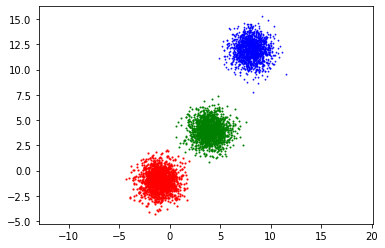

In [44]:
centers, labels, it = kmeans(dataset, k)
print('The algorithm took :',it, 'iterations')
print('Centers found:')
final_centers = centers[-1]
print(final_centers)
print(means)
display(dataset, labels[-1])